<a href="https://colab.research.google.com/github/harryshil926/Classification_Patient_Non-Patient_Conversations/blob/master/apply_wavelet_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import os
import cv2
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings("ignore")
from skimage import data, segmentation, color
from skimage.future import graph
from torchvision import transforms

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
def load_data(path,images_to_load=50,resize=True,resize_dim=(512,512),valid_suffix='Mask'):
  '''
  path : The path where the images are located.
  images_to_load : Maximum number of images to load.
  resize : Whether to resize the image.
  resize_dim : Specify dimensions for resizing, used only when resize=True.

  Return
  ------
  Loaded image and filename as a tuple for each entry.
  '''
  valid_images = [valid_suffix]
  img_dict = {}
  for f in os.listdir(path):
    ext = os.path.splitext(f)[0]
    if ext.split('_')[1] not in valid_images:
        continue
    img = cv2.imread(os.path.join(path,f))
    if resize:
      img = cv2.resize(img, resize_dim)
    img_dict.update({f[:4]:img})
  return img_dict


In [6]:
melanoma_img_path = '/content/gdrive/MyDrive/CS_EE_577/Dataset/SegmentedImages_NormalizedCut/Melanoma/'
non_melanoma_img_path = '/content/gdrive/MyDrive/CS_EE_577/Dataset/SegmentedImages_NormalizedCut/Non_Melanoma/'

In [7]:
m_segment_dict = load_data(melanoma_img_path,valid_suffix='SegmentedImage')
nm_segment_dict = load_data(melanoma_img_path,valid_suffix='SegmentedImage')

In [8]:
m_segment_dict.keys()

dict_keys(['0101', '0121', '0132', '0137', '0187', '0203', '0207', '0218', '0229', '0230'])

In [10]:
melanoma_img_path = '/content/gdrive/MyDrive/CS_EE_577/Dataset/SegmentedImages_NormalizedCut/Melanoma/'
m_depth_segment_dict = load_data(melanoma_img_path,valid_suffix='SegmentedImage')

In [11]:
img = m_segment_dict['0101'].swapaxes(0,2)


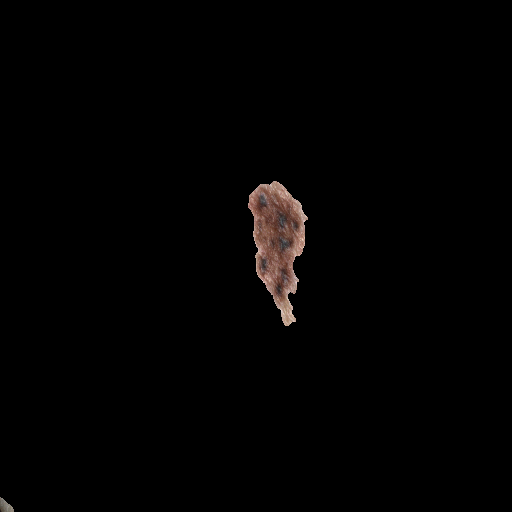

In [12]:
cv2_imshow(m_segment_dict['0101'])

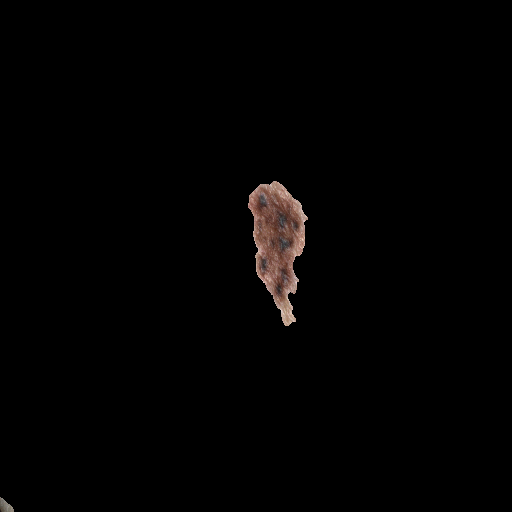

In [13]:
cv2_imshow(m_depth_segment_dict['0101'])

In [14]:
m_segment_dict['0101'].swapaxes(0,2).shape

(3, 512, 512)

In [34]:
import torch
torch.manual_seed(2)
data_transforms = transforms.Compose([transforms.ToPILImage(),
                                      transforms.RandomRotation(degrees=(0,360)),
                                      transforms.Resize((64, 64)),
                                      transforms.ToTensor(),
		                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])])

img = torch.from_numpy(m_segment_dict['0101'].swapaxes(0,2))
op = data_transforms(img)

In [28]:
# Pipeline for each RGB image


In [29]:
img = torch.from_numpy(m_segment_dict['0101'].swapaxes(0,2)).float()
#data_transforms(img)
print(type(img))

<class 'torch.Tensor'>


In [30]:
op = data_transforms(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


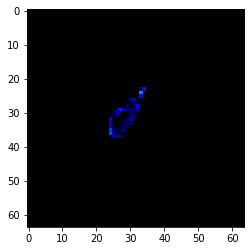

In [38]:
def show(img):
    npimg = img.numpy()
   # plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.imshow(npimg.swapaxes(0,2))
show(op)

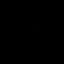

In [113]:
temp = np.array(op)
cv2_imshow(temp.swapaxes(0,2))

In [ ]:
data_transforms(img)

In [30]:
from kymatio.numpy import Scattering2D

S = Scattering2D(J=2, shape=(32, 32))
res = S.scattering()

TypeError: ignored

In [28]:
def load_data(data_folder, batch_size, train, kwargs):
    transform = {
        'train': transforms.Compose(
            [transforms.Resize([256, 256]),
                transforms.RandomCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])]),
        'test': transforms.Compose(
            [transforms.Resize([224, 224]),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])])
        }
    data = datasets.ImageFolder(root = data_folder, transform=transform['train' if train else 'test'])
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, **kwargs, drop_last = True if train else False)
    return data_loader 

Compose(
    ToPILImage()
    RandomRotation(degrees=[-180.0, 180.0], interpolation=nearest, expand=False, fill=(0,))
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
def load_data(data_folder, batch_size, train, kwargs):
    data_transforms = transforms.Compose([transforms.ToPILImage(),
    transforms.RandomRotation(degrees=(-180, 180), fill=(0,)),
		transforms.Resize((64, 64)),
		transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

    data = datasets.ImageFolder(root = data_folder, transform=transform['train' if train else 'test'])
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, **kwargs, drop_last = True if train else False)
    return data_loader 

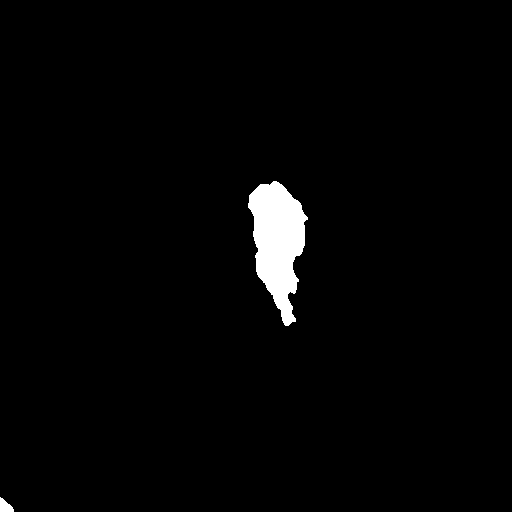

In [12]:
cv2_imshow(m_lst[0][0])

In [ ]:
! pip install kymatio

     |████████████████████████████████| 93 kB 1.2 MB/s 


In [ ]:
img = cv2.resize(m_lst[1][0],(32,32))
r,g,b = cv2.split(img)
r.shape

(32, 32)

In [ ]:
from kymatio.numpy import Scattering2D

S = Scattering2D(J=2, shape=(32, 32))
res = S.scattering(r)

In [ ]:
res.shape 

(81, 8, 8)

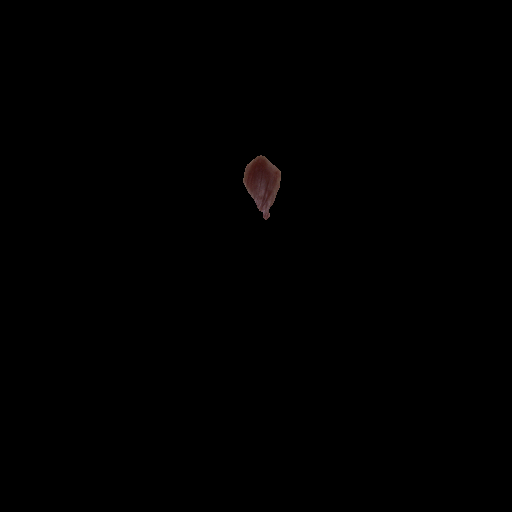

In [ ]:
cv2_imshow(m_lst[1][0])

In [ ]:
pywt.scale2frequency('morl', 3)

0.2708333333333333

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


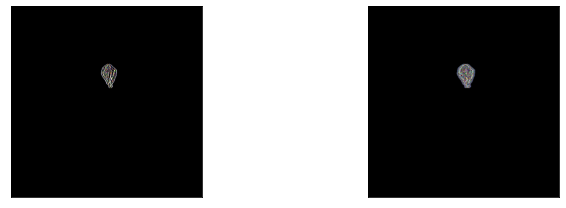

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

original = m_lst[1][0]
coeffs2,_ = pywt.cwt(original,scales=np.arange(1,4),wavelet='morl',method='fft',axis=1)
fig = plt.figure(figsize=(12, 3))
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1)
    ax.imshow(coeffs2[i])
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
m_l

(3, 512, 512, 3)

In [ ]:
m_lst[0][0].shape

(512, 512, 3)

In [ ]:
cv2_imshow(coeffs[4][0])

IndexError: ignored

TypeError: ignored

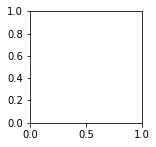

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(res[0][:]) # doctest: +SKIP
plt.show() # doctest: +SKIP


In [ ]:
y

array([ 0.00000000e+00,  1.95090322e-01,  3.82683432e-01,  5.55570233e-01,
        7.07106781e-01,  8.31469612e-01,  9.23879533e-01,  9.80785280e-01,
        1.00000000e+00,  9.80785280e-01,  9.23879533e-01,  8.31469612e-01,
        7.07106781e-01,  5.55570233e-01,  3.82683432e-01,  1.95090322e-01,
        1.22464680e-16, -1.95090322e-01, -3.82683432e-01, -5.55570233e-01,
       -7.07106781e-01, -8.31469612e-01, -9.23879533e-01, -9.80785280e-01,
       -1.00000000e+00, -9.80785280e-01, -9.23879533e-01, -8.31469612e-01,
       -7.07106781e-01, -5.55570233e-01, -3.82683432e-01, -1.95090322e-01,
       -2.44929360e-16,  1.95090322e-01,  3.82683432e-01,  5.55570233e-01,
        7.07106781e-01,  8.31469612e-01,  9.23879533e-01,  9.80785280e-01,
        1.00000000e+00,  9.80785280e-01,  9.23879533e-01,  8.31469612e-01,
        7.07106781e-01,  5.55570233e-01,  3.82683432e-01,  1.95090322e-01,
        3.67394040e-16, -1.95090322e-01, -3.82683432e-01, -5.55570233e-01,
       -7.07106781e-01, -